In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
airbnb=pd.read_csv('/Volumes/º/new-york-city-airbnb-open-data 2/AB_NYC_2019.csv')

In [3]:
#Data cleaning 

In [4]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb[airbnb['reviews_per_month'].isna()] = 0

In [5]:
print(f"Number of records after cleaning: {airbnb.count()[0]}")

Number of records after cleaning: 48895


In [6]:
#Remove "empty records"
airbnb= airbnb[airbnb['price'] != 0]

In [7]:
print(f"Number of records after cleaning: {airbnb.count()[0]}")

Number of records after cleaning: 38833


In [8]:
#Remove outliers
airbnb = airbnb[airbnb.price<= 500]

In [9]:
print(f"Number of records after cleaning: {airbnb.count()[0]}")

Number of records after cleaning: 38211


In [10]:
airbnb.isnull().sum()

id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
#delete columns that are not necessary or for data protection
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [12]:
airbnb.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [13]:
inputs = airbnb.drop('price', axis=1)
target = airbnb['price']

In [14]:
from sklearn.preprocessing import LabelEncoder
le_neighbourhood_group=LabelEncoder()
le_neighbourhood=LabelEncoder()
le_room_type=LabelEncoder()

inputs['neighbourhood_group_n']=le_neighbourhood_group.fit_transform(inputs['neighbourhood_group'])
inputs['neighbourhood_n']=le_neighbourhood.fit_transform(inputs['neighbourhood'])
inputs['room_type_n']=le_room_type.fit_transform(inputs['room_type'])


In [15]:
inputs_n=inputs.drop(['neighbourhood_group','neighbourhood','room_type'], axis=1)
inputs_n

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,2787,40.64749,-73.97237,1,9,0.21,6,365,1,107,1
1,2845,40.75362,-73.98377,1,45,0.38,2,355,2,126,0
3,4869,40.68514,-73.95976,1,270,4.64,1,194,1,41,0
4,7192,40.79851,-73.94399,10,9,0.10,1,0,2,61,0
5,7322,40.74767,-73.97500,3,74,0.59,1,129,2,136,0
...,...,...,...,...,...,...,...,...,...,...,...
48782,83554966,40.78099,-73.95366,1,1,1.00,1,147,2,199,1
48790,257683179,40.75104,-73.81459,1,1,1.00,6,339,3,77,1
48799,211644523,40.54179,-74.14275,1,1,1.00,1,87,4,89,1
48805,273841667,40.80787,-73.92400,1,2,2.00,1,40,0,133,0


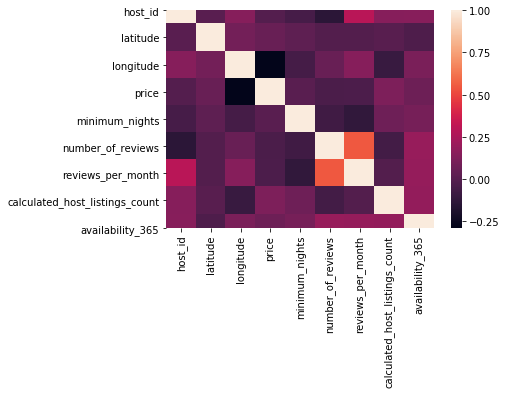

In [16]:
corr = airbnb.corr()
sns.heatmap(corr)

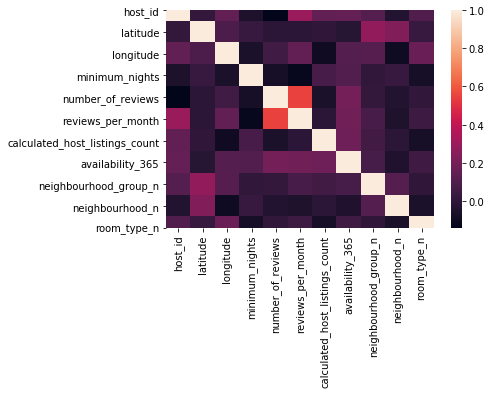

In [17]:
corr = inputs_n.corr()
sns.heatmap(corr)

In [205]:
#splitting & scaling the data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.3)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(26747, 11) (26747,)
(11464, 11) (11464,)


In [206]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

In [142]:
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 14.16
Mean Squared Error: 468.58
Root Mean Squared Error: 21.65


In [127]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestRegressor(n_estimators=20, random_state=0)

scoring1 = 'neg_mean_absolute_error'
MAE = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring1)

scoring2 = 'neg_mean_squared_error'
MSE = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring2)

scoring2 = 'r2'
R2 = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring2)

print('Mean Absolute Error after Cross Validation:', round(-MAE.mean(),2))
print('Mean Squared Error after Cross Validation:', round(-MSE.mean(),2))
print('R2 after Cross Validation:', round(R2.mean(),2))

Mean Absolute Error after Cross Validation: 39.24
Mean Squared Error after Cross Validation: 3567.22
R2 after Cross Validation: 0.5


In [129]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= airbnb.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [130]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [143]:
#Randomized Grid search CV
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestRegressor(random_state=42)
param_distributions = { 
    'n_estimators': [10, 20, 40, 50, 100, 200, 300, 500]
}

CV_rfc = RandomizedSearchCV(rfc, param_distributions, n_iter=10, verbose=2, cv= 3)
CV_rfc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   1.6s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   1.6s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   1.6s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=   3.2s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=   3.2s
[CV] n_estimators=40 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=4

In [144]:
CV_rfc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [145]:
#Test the training set with the RandomGridsearch result
y_pred = CV_rfc.best_estimator_.predict(X_train)
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 14.11
Mean Squared Error: 462.95
Root Mean Squared Error: 21.52


In [134]:
some_data = CV_rfc.predict(X_train[:5,:])
print("Predicted Results:", some_data)

Predicted Results: [ 66.30466759 216.04592552  61.65437193  63.07642718  61.55474501]


In [135]:
print("Actual Results:", list((y_train[:5])))

Actual Results: [90, 225, 75, 85, 40]


In [136]:
#Create a data frame of actual and predicted values
error_cars = pd.DataFrame({
        'Actual Values': np.array(y_train).flatten(),
        'Predicted Values': y_pred.flatten()}).head(20)
error_cars

,Actual Values,Predicted Values
0,90,66.304668
1,225,216.045926
2,75,61.654372
3,85,63.076427
4,40,61.554745
5,200,189.642177
6,37,63.667392
7,200,193.641888
8,200,214.944728
9,55,61.831095


In [137]:
import plotly as plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

title=['Predicted vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_cars.index, y=error_cars['Predicted Values']),
    go.Bar(name='Actual', x=error_cars.index, y=error_cars['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

In [147]:
regressor = CV_rfc.best_estimator_

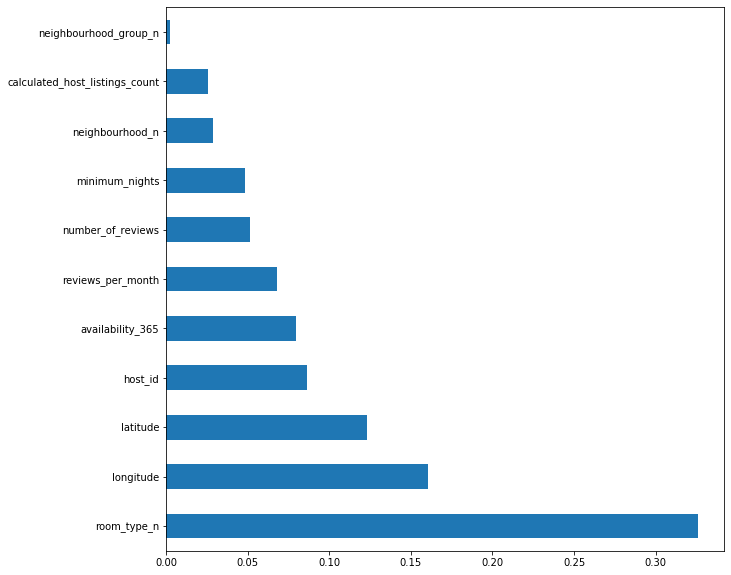

In [148]:
#Feature importance
feat_importances = pd.Series(regressor.feature_importances_, index=inputs_n.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

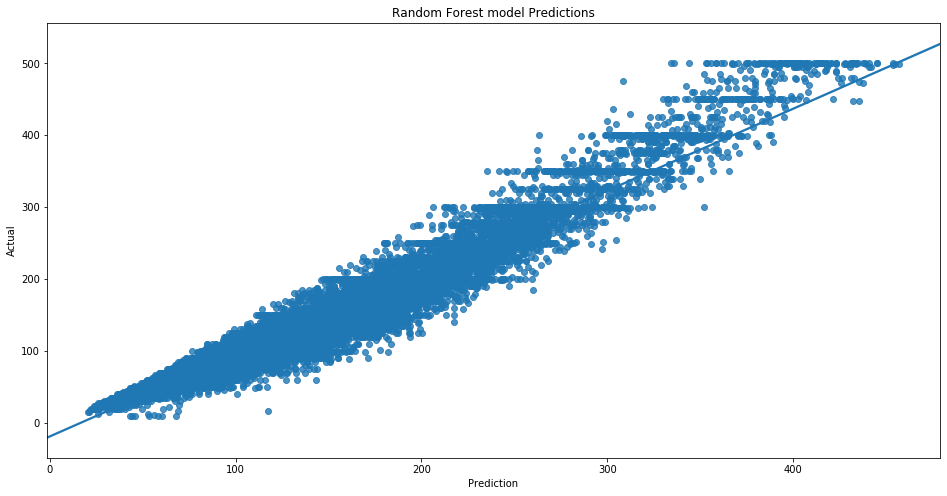

In [149]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_train)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Random Forest model Predictions")
plt.show()

In [152]:
#remove less important 
#Drop Drivetrain and Passenger doors as they are not important features
important_feat =inputs_n.drop(['neighbourhood_group_n'], axis=1)
important_feat


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_n,room_type_n
0,2787,40.64749,-73.97237,1,9,0.21,6,365,107,1
1,2845,40.75362,-73.98377,1,45,0.38,2,355,126,0
3,4869,40.68514,-73.95976,1,270,4.64,1,194,41,0
4,7192,40.79851,-73.94399,10,9,0.10,1,0,61,0
5,7322,40.74767,-73.97500,3,74,0.59,1,129,136,0
...,...,...,...,...,...,...,...,...,...,...
48782,83554966,40.78099,-73.95366,1,1,1.00,1,147,199,1
48790,257683179,40.75104,-73.81459,1,1,1.00,6,339,77,1
48799,211644523,40.54179,-74.14275,1,1,1.00,1,87,89,1
48805,273841667,40.80787,-73.92400,1,2,2.00,1,40,133,0


In [153]:
#splitting & scaling the data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(important_feat, target, test_size=0.3 )

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(26747, 10) (26747,)
(11464, 10) (11464,)


In [154]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [155]:
regressor = CV_rfc.best_estimator_
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

In [156]:
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 14.04
Mean Squared Error: 457.63
Root Mean Squared Error: 21.39


In [157]:
y_pred = regressor.predict(X_test)

In [158]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 38.19
Mean Squared Error: 3404.99
Root Mean Squared Error: 58.35


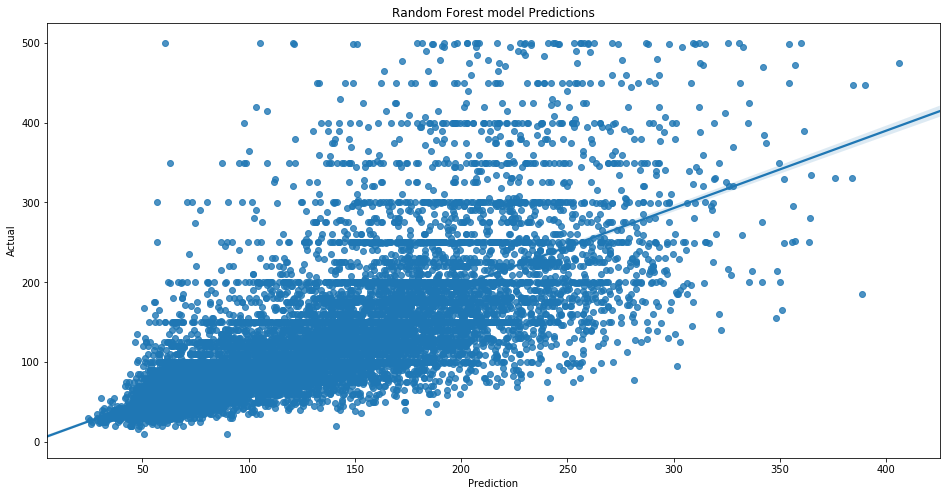

In [159]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Random Forest model Predictions")
plt.show()

# SVR

In [176]:
from sklearn.svm import LinearSVR

In [177]:
#Fit the model
svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg1.fit(X_train, y_train)
y_pred = svm_reg1.predict(X_train)
y_pred

array([ 57.48979588, 151.0285235 ,  75.45238502, ...,  77.64941396,
        55.10094043,  85.02969301])

In [180]:
svm_reg1

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [179]:
#Print metrics
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 43.35
Mean Squared Error: 4685.93
Root Mean Squared Error: 68.45


In [183]:
#Now try rbf kernal
from sklearn.svm import SVR
svr = SVR( kernel='rbf', gamma = 'scale')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_train)
y_pred

array([ 51.3094734 , 169.17344699,  63.62365674, ...,  70.71903128,
        58.49535557,  93.51787116])

In [184]:
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 40.52
Mean Squared Error: 4291.79
Root Mean Squared Error: 65.51


In [185]:
#Test the model
y_pred = svr.predict(X_test)

In [186]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 40.88
Mean Squared Error: 4445.6
Root Mean Squared Error: 66.68


In [187]:
#Create a data frame of actual and predicted values
error_cars = pd.DataFrame({
        'Actual Values': y_test,
        'Predicted Values': y_pred}).head(20)
error_cars

,Actual Values,Predicted Values
11915,200,156.872209
24873,97,75.037482
17262,109,139.134354
5245,39,73.683220
10561,50,72.540480
4318,100,134.924990
11293,111,85.170858
18518,275,136.393766
17946,90,95.748751
7421,80,80.409298


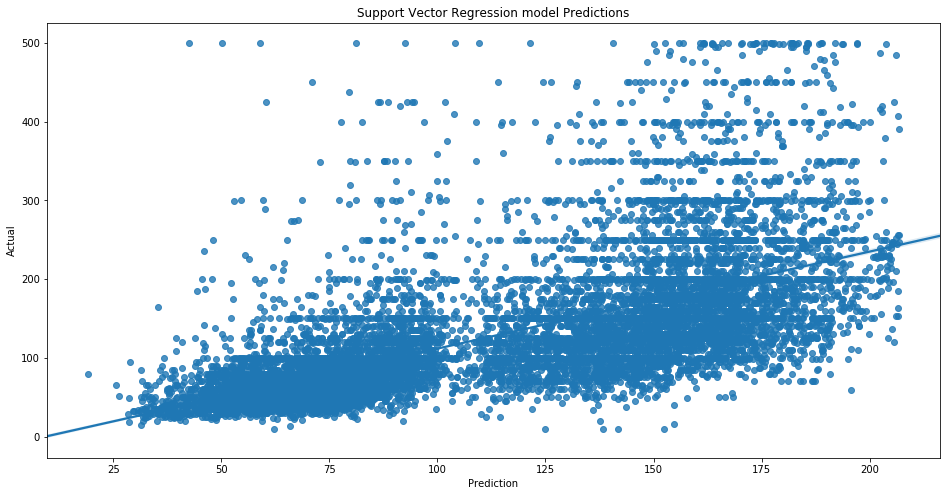

In [189]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Support Vector Regression model Predictions")
plt.show()

# Linear Regression

In [215]:
#LinearRegression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
y_pred = reg.predict(X_train)
y_pred

array([ 53.66557281,  48.05766082,  56.45209443, ..., 186.120002  ,
       142.46392676,  83.55249918])

In [217]:
some_data =reg.predict(X_train)
some_data [:5]

array([53.66557281, 48.05766082, 56.45209443, 83.2334935 , 70.99485771])

In [218]:
print("Actual Results:", list((y_train)[:5]))

Actual Results: [45, 52, 62, 54, 70]


In [219]:
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 44.9
Mean Squared Error: 4301.39
Root Mean Squared Error: 65.58


In [222]:
#Test the model
y_pred = reg.predict(X_test)

In [223]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 45.23
Mean Squared Error: 4424.21
Root Mean Squared Error: 66.51


In [224]:
from sklearn.metrics import r2_score

In [225]:
print(r2_score(y_test, y_pred))


0.3794876912230546


In [226]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [227]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [228]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred = lin_reg_2.predict(X_poly)

In [232]:
print('Mean Absolute Error:', round(mean_absolute_error(y_train,y_pred),2))
print('Mean Squared Error:', round( mean_squared_error(y_train,y_pred),2))
print('Root Mean Squared Error:', round(sqrt(mean_squared_error(y_train, y_pred)),2))

Mean Absolute Error: 40.65
Mean Squared Error: 3686.36
Root Mean Squared Error: 60.72


In [230]:
print(r2_score(y_train, y_pred))

0.4790310755531334
